In [1]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Support Vector Regression
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset= pd.read_csv("../../data/position_salaries.csv")

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [2]:
# features
X=dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [3]:
# #test train split
# from sklearn.cross_validation import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
#Encoding categorical data
#encoding the independent variable
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X=LabelEncoder()
# X[:,0]=labelencoder_X.fit_transform(X[:,0])
# onehotencoder = OneHotEncoder(categorical_features=[0])
# X=onehotencoder.fit_transform(X).toarray()
# labelencoder_y=LabelEncoder()
# y=labelencoder_y.fit_transform(y)

In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [6]:
#fitting reg model to dataset
#create your regressor here
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

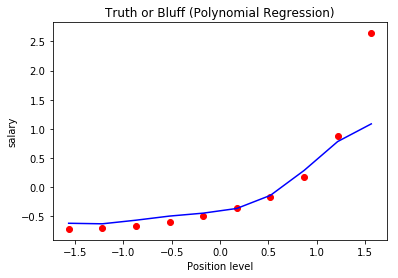

In [26]:
#visualizing linear regression
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('salary')
plt.show()

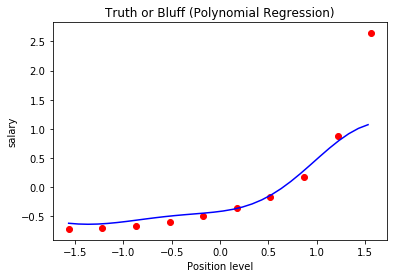

In [9]:
#visualizing linear regression for higher resolution
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('salary')
plt.show()

In [7]:
#predicting a new result with polynomial reg
y_pred=sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

In [8]:
y_pred

array([ 170370.0204065])